In [1]:
import networkx as nx
from collections import namedtuple
import numpy as np
from scipy.linalg import norm
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from typing import List, Union, Tuple

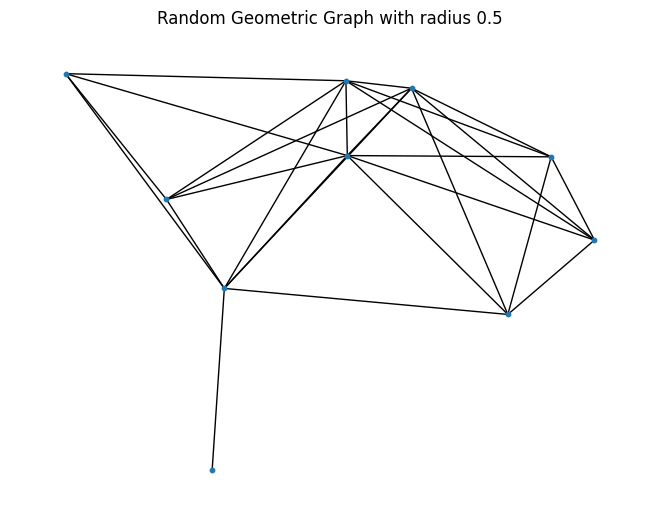

Adjacency Matrix:
 [[0 1 1 1 1 0 0 1 1 1]
 [1 0 1 0 1 0 1 0 1 0]
 [1 1 0 1 1 0 1 1 1 1]
 [1 0 1 0 1 0 0 1 0 1]
 [1 1 1 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 1 0 1 0 0 0 1 0]
 [1 0 1 1 0 0 0 0 1 1]
 [1 1 1 0 1 1 1 1 0 0]
 [1 0 1 1 1 0 0 1 0 0]]
Degree Matrix:
 [[7 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 5]]
Laplacian Matrix:
 [[ 7 -1 -1 -1 -1  0  0 -1 -1 -1]
 [-1  5 -1  0 -1  0 -1  0 -1  0]
 [-1 -1  8 -1 -1  0 -1 -1 -1 -1]
 [-1  0 -1  5 -1  0  0 -1  0 -1]
 [-1 -1 -1 -1  7  0 -1  0 -1 -1]
 [ 0  0  0  0  0  1  0  0 -1  0]
 [ 0 -1 -1  0 -1  0  4  0 -1  0]
 [-1  0 -1 -1  0  0  0  5 -1 -1]
 [-1 -1 -1  0 -1 -1 -1 -1  7  0]
 [-1  0 -1 -1 -1  0  0 -1  0  5]]


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_geometric_graph(n, radius):
    G = nx.random_geometric_graph(n, radius)
    return G

def plot_graph(G, title):
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_size=10, with_labels=False)
    plt.title(title)
    plt.show()

# Number of nodes
n = 10

# Different radii for different connectivity levels
# radii = [0.05, 0.1, 0.2, 0.3]
radius = 0.5
# for radius in radii:
G = generate_random_geometric_graph(n, radius)
plot_graph(G, f"Random Geometric Graph with radius {radius}")
# Step 1: Generate the adjacency matrix
A = nx.adjacency_matrix(G).toarray()

# Step 2: Generate the degree matrix (node matrix)
D = np.diag(A.sum(axis=1))

# Step 3: Compute the Laplacian matrix
L = D - A

print("Adjacency Matrix:\n", A)
print("Degree Matrix:\n", D)
print("Laplacian Matrix:\n", L)